<a href="https://colab.research.google.com/github/juli-ter/Project_SAS/blob/master/4_PCA_%2B_clust_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
pd.options.display.max_columns = 200
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
path = "/content/drive/My Drive/Optimisation/"
df = pd.read_csv(path+'showcase.csv', encoding='utf-8')#выгружаем витрину
data = df.drop(['Unnamed: 0'], axis=1)
data.head()

,Телефон_new,Revenue,Marge,КоличествоПроданоКлиенту,КоличествоЧеков,СреднийЧек,СреднийЧислоТоваровЧека,СредняяМаржа,АВТОКРЕСЛА,АКСЕССУАРЫ,АКСЕССУАРЫ ДЛЯ ВОЛОС,АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,"АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР",АКТИВНЫЙ ОТДЫХ,БАКАЛЕЯ,БИЖУТЕРИЯ,БУТЫЛОЧКИ,БЫТОВАЯ ХИМИЯ ДЛЯ ЖИВОТНЫХ,ВЕЛОСИПЕДЫ/САМОКАТЫ,ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,ВИТАМИНЫ/БАДЫ,ВСЁ ДЛЯ ПРАЗДНИКА,ГАЛАНТЕРЕЯ,"ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",ДЕТСКАЯ КОСМЕТИКА,"ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),ДЕТСКАЯ ОДЕЖДА (7-16 лет),ДЕТСКИЕ КОЛГОТКИ И НОСКИ,ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ БЕЛЬЁ,ЗАМЕНИТЕЛИ МОЛОКА,ЗЕРКАЛА,ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,КАНЦТОВАРЫ,КАТАЛКИ/КАЧАЛКИ,КАШИ,КИСЛОМОЛОЧНЫЕ ПРОДУКТЫ,КОЛЯСКИ,КОЛЯСКИ ДЛЯ КУКОЛ,КОНДИТЕРСКИЕ ИЗДЕЛИЯ,КОНСТРУКТОРЫ,"КОПИЛКИ, БРЕЛОКИ, МАГНИТИКИ","КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК",КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,ЛАМПЫ/СВЕТИЛЬНИКИ,МАНЕЖИ/ШЕЗЛОНГИ,МЕДИАПРОДУКЦИЯ,МОЛОКООТСОСЫ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,МЯГКИЕ ИГРУШКИ,НАПИТКИ,НАСТОЛЬНЫЕ ИГРЫ,ОБУВЬ ДЕТСКАЯ,ОБУВЬ ЖЕНСКАЯ,ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),"ОДЕЖДА, ОБУВЬ",ПЕЛЕНКИ ОДНОРАЗОВЫЕ,ПОДГУЗНИКИ,ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ,ПОСТЕЛЬНОЕ БЕЛЬЕ,ПОСУДА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ,ПЮРЕ,САНКИ/СНЕГОКАТЫ,СИСТЕМЫ ХРАНЕНИЯ,СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ,СОСКИ/ПУСТЫШКИ,СПОРТ.ИНВЕНТАРЬ,СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ,СРЕДСТВА БЫТОВОЙ ХИМИИ,СРЕДСТВА ГИГИЕНЫ,СУВЕНИРНАЯ ПРОДУКЦИЯ,СУМКИ,СУМКИ ДЛЯ МАМ,ТВОРЧЕСТВО,ТЕХНИКА ДЛЯ КРАСОТЫ И ЗДОРОВЬЯ,ТОВАРЫ ДЛЯ ГРЫЗУНОВ,ТОВАРЫ ДЛЯ КОШЕК,ТОВАРЫ ДЛЯ МАМ,ТОВАРЫ ДЛЯ ПТИЦ,ТОВАРЫ ДЛЯ РЫБ,ТОВАРЫ ДЛЯ СОБАК,ТОВАРЫ ДЛЯ ХОРЬКОВ,ТОВАРЫ ДЛЯ ЧЕРЕПАХ И РЕПТИЛИЙ,ТРУСИКИ НЕПРОМОКАЕМЫЕ,"ФИГУРЫ, ПЕРСОНАЖИ",ФОТОАЛЬБОМЫ/ФОТОРАМКИ,ХОДУНКИ/ПРЫГУНКИ,ХОЗЯЙСТВЕННЫЕ ТОВАРЫ,ЧАСЫ/ОЧКИ,"ШАПКИ, ШАРФЫ",ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ,ЭЛЕКТРОПРИБОРЫ,ЭЛЕМЕНТЫ ПИТАНИЯ,ИГРУШКИ,ИНОЕ,КГТ,ОДЕЖДА,ППКП,Безналичная,Наличная,МО,Москва,Регионы
0,32555749-545749525150 .,1039.0,174.66,5,1,1039.0,5.0,174.660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
1,55494851-56495152535476,1630.0,376.02,1,1,1630.0,1.0,376.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0
2,55574848-48485149515175,62740.0,27213.00,2,1,62740.0,2.0,27213.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0
3,55574848-48485149515377,4460.0,1467.00,1,1,4460.0,1.0,1467.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0
4,55574848-48494948544878,4801.0,953.85,12,2,2400.5,6.0,476.925,0.0,0.0,0.0,0.0,0.0,0.

In [10]:
data = data.drop(['Телефон_new'], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58030 entries, 0 to 58029
Columns: 108 entries, Revenue to Регионы
dtypes: float64(106), int64(2)
memory usage: 47.8 MB


In [0]:
scaler = StandardScaler()
scaler.fit(data)
data1 = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
#standardize the dataset

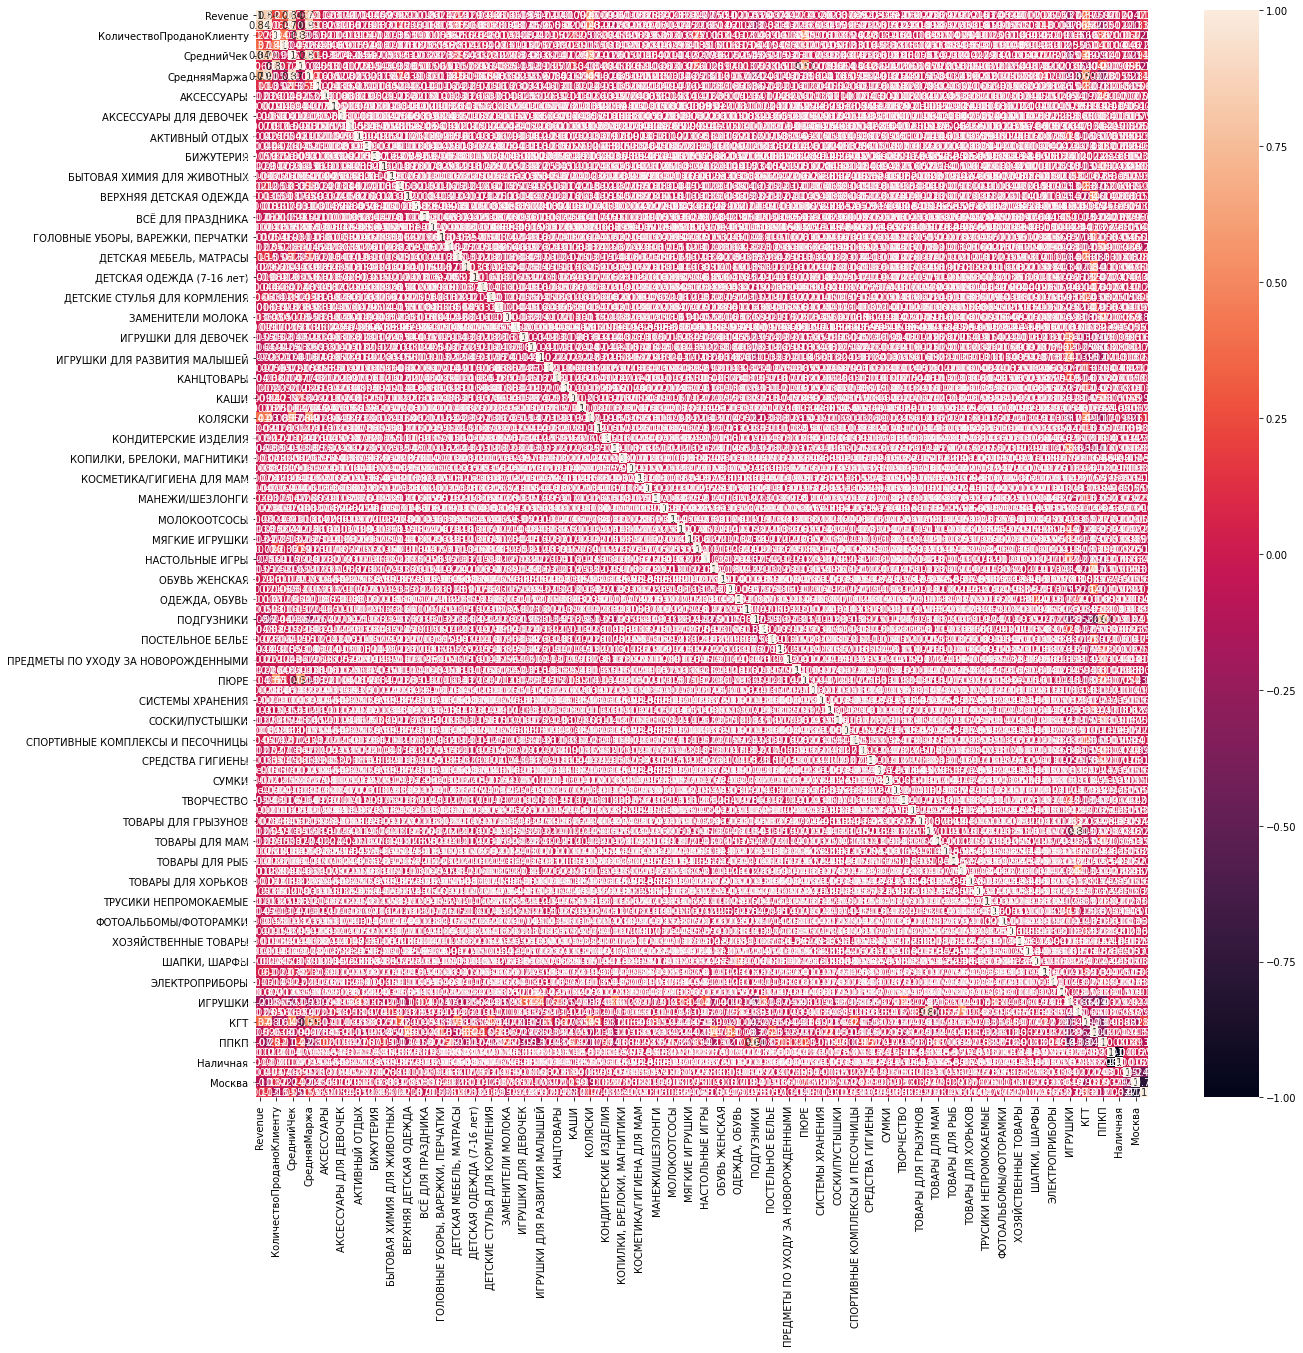

In [12]:
import seaborn as sns
plt.figure(figsize=(20, 20)) 
sns.heatmap(data1.corr(), annot=True) 
plt.show()
#построили матрицу ковариации

In [0]:
def get_corr_cols(data, treshold): 
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > treshold)]
    return to_drop

def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1) 
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index 
    df_out = df_in[un_corr_idx] 
    return df_out

In [0]:
data_drop_corr = trimm_correlated(data1, 0.6)

In [14]:
data_drop_corr

,Revenue,КоличествоПроданоКлиенту,КоличествоЧеков,АВТОКРЕСЛА,АКСЕССУАРЫ,АКСЕССУАРЫ ДЛЯ ВОЛОС,АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,"АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР",АКТИВНЫЙ ОТДЫХ,БАКАЛЕЯ,БИЖУТЕРИЯ,БУТЫЛОЧКИ,БЫТОВАЯ ХИМИЯ ДЛЯ ЖИВОТНЫХ,ВЕЛОСИПЕДЫ/САМОКАТЫ,ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,ВИТАМИНЫ/БАДЫ,ВСЁ ДЛЯ ПРАЗДНИКА,ГАЛАНТЕРЕЯ,"ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",ДЕТСКАЯ КОСМЕТИКА,"ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),ДЕТСКАЯ ОДЕЖДА (7-16 лет),ДЕТСКИЕ КОЛГОТКИ И НОСКИ,ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ БЕЛЬЁ,ЗАМЕНИТЕЛИ МОЛОКА,ЗЕРКАЛА,ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,КАНЦТОВАРЫ,КАТАЛКИ/КАЧАЛКИ,КАШИ,КИСЛОМОЛОЧНЫЕ ПРОДУКТЫ,КОЛЯСКИ,КОЛЯСКИ ДЛЯ КУКОЛ,КОНДИТЕРСКИЕ ИЗДЕЛИЯ,КОНСТРУКТОРЫ,"КОПИЛКИ, БРЕЛОКИ, МАГНИТИКИ","КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК",КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,ЛАМПЫ/СВЕТИЛЬНИКИ,МАНЕЖИ/ШЕЗЛОНГИ,МЕДИАПРОДУКЦИЯ,МОЛОКООТСОСЫ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,МЯГКИЕ ИГРУШКИ,НАПИТКИ,НАСТОЛЬНЫЕ ИГРЫ,ОБУВЬ ДЕТСКАЯ,ОБУВЬ ЖЕНСКАЯ,ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),"ОДЕЖДА, ОБУВЬ",ПЕЛЕНКИ ОДНОРАЗОВЫЕ,ПОДГУЗНИКИ,ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ,ПОСТЕЛЬНОЕ БЕЛЬЕ,ПОСУДА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ,ПЮРЕ,САНКИ/СНЕГОКАТЫ,СИСТЕМЫ ХРАНЕНИЯ,СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ,СОСКИ/ПУСТЫШКИ,СПОРТ.ИНВЕНТАРЬ,СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ,СРЕДСТВА БЫТОВОЙ ХИМИИ,СРЕДСТВА ГИГИЕНЫ,СУВЕНИРНАЯ ПРОДУКЦИЯ,СУМКИ,СУМКИ ДЛЯ МАМ,ТВОРЧЕСТВО,ТЕХНИКА ДЛЯ КРАСОТЫ И ЗДОРОВЬЯ,ТОВАРЫ ДЛЯ ГРЫЗУНОВ,ТОВАРЫ ДЛЯ КОШЕК,ТОВАРЫ ДЛЯ МАМ,ТОВАРЫ ДЛЯ ПТИЦ,ТОВАРЫ ДЛЯ РЫБ,ТОВАРЫ ДЛЯ СОБАК,ТОВАРЫ ДЛЯ ХОРЬКОВ,ТОВАРЫ ДЛЯ ЧЕРЕПАХ И РЕПТИЛИЙ,ТРУСИКИ НЕПРОМОКАЕМЫЕ,"ФИГУРЫ, ПЕРСОНАЖИ",ФОТОАЛЬБОМЫ/ФОТОРАМКИ,ХОДУНКИ/ПРЫГУНКИ,ХОЗЯЙСТВЕННЫЕ ТОВАРЫ,ЧАСЫ/ОЧКИ,"ШАПКИ, ШАРФЫ",ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ,ЭЛЕКТРОПРИБОРЫ,ЭЛЕМЕНТЫ ПИТАНИЯ,ИГРУШКИ,КГТ,ОДЕЖДА,Безналичная,МО,Москва
0,-0.534337,-0.004645,-0.330553,-0.156372,-0.167782,-0.022612,-0.036957,-0.009712,-0.141815,-0.068878,-0.005374,-0.115899,-0.015114,-0.166063,-0.208022,-0.008829,-0.070953,-0.006588,-0.108269,-0.154713,-0.193257,-0.166970,-0.113017,-0.099553,-0.123218,-0.099935,-0.150571,-0.004482,-0.228465,-0.197682,-0.321491,-0.103396,-0.14604,-0.091552,-0.132561,-0.015349,-0.239896,-0.080439,-0.075556,-0.231283,-0.015513,-0.045504,-0.013642,-0.02216,-0.078042,-0.008675,-0.05055,-0.10148,-0.092406,-0.067904,-0.182676,-0.220208,-0.004151,-0.221243,-0.024828,-0.103586,-0.454130,9.725317,-0.143743,-0.143438,-0.105436,-0.067857,-0.172431,-0.025294,-0.004151,-0.073226,-0.137803,-0.004151,-0.131695,-0.112282,-0.171882,-0.004151,-0.011209,-0.020934,-0.153262,-0.005034,-0.017822,-0.115512,-0.127626,-0.009203,-0.010743,-0.068031,-0.004151,-0.006439,-0.064347,-0.115408,-0.031814,-0.051226,-0.015391,-0.009043,-0.005834,-0.061018,-0.067261,-0.035027,1.637890,-0.510915,-0.497085,0.004151,-0.363915,1.444821
1,-0.427257,-0.364133,-0.330553,-0.156372,-0.167782,-0.022612,-0.036957,-0.009712,-0.141815,-0.068878,-0.005374,-0.115899,-0.015114,-0.166063,-0.208022,-0.008829,-0.070953,-0.006588,-0.108269,-0.154713,-0.193257,-0.166970,-0.113017,-0.099553,-0.123218,-0.099935,-0.150571,-0.004482,-0.228465,-0.197682,4.345220,-0.103396,-0.14604,-0.091552,-0.132561,-0.015349,-0.239896,-0.080439,-0.075556,-0.231283,-0.015513,-0.045504,-0.013642,-0.02216,-0.078042,-0.008675,-0.05055,-0.10148,-0.092406,-0.067904,-0.182676,-0.220208,-0.004151,-0.221243,-0.024828,-0.103586,-0.454130,-0.158759,-0.143743,-0.143438,-0.105436,-0.067857,-0.172431,-0.025294,-0.004151,-0.073226,-0.137803,-0.004151,-0.131695,-0.112282,-0.171882,-0.004151,-0.011209,-0.020934,-0.153262,-0.005034,-0.017822,-0.115512,-0.127626,-0.009203,-0.010743,-0.068031,-0.004151,-0.006439,-0.064347,-0.115408,-0.031814,-0.051226,-0.015391,-0.009043,-0.005834,-0.061018,-0.067261,-0.035027,1.637890,-0.510915,-0.497085,0.004151,-0.363915,-0.697977
2,10.644893,-0.274261,-0.330553,-0.156372,-0.167782,-0.022612,-0.036957,-0.009712,-0.141815,-0.068878,-0.005374,-0.115899,-0.015114,-0.166063,-0.208022,-0.008829,-0.070953,-0.006588,-0.108269,-0.154713,-0.19325

In [15]:
data_drop_corr.info()
rows, cols = data_drop_corr.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58030 entries, 0 to 58029
Data columns (total 100 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Revenue                              58030 non-null  float64
 1   КоличествоПроданоКлиенту             58030 non-null  float64
 2   КоличествоЧеков                      58030 non-null  float64
 3   АВТОКРЕСЛА                           58030 non-null  float64
 4   АКСЕССУАРЫ                           58030 non-null  float64
 5   АКСЕССУАРЫ ДЛЯ ВОЛОС                 58030 non-null  float64
 6   АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК               58030 non-null  float64
 7   АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР           58030 non-null  float64
 8   АКТИВНЫЙ ОТДЫХ                       58030 non-null  float64
 9   БАКАЛЕЯ                              58030 non-null  float64
 10  БИЖУТЕРИЯ                            58030 non-null  float64
 11  БУТЫЛОЧКИ                  

In [16]:
print(rows, cols)

58030 100


In [0]:
X = data_drop_corr.values

In [0]:
from sklearn.decomposition import PCA
from sklearn import metrics
from tqdm import tqdm_notebook as tqdm

In [19]:
n_components = np.arange(1, cols) 
rmses = []
maes = []
with tqdm(total=len(n_components)) as pbar: 
    for n in n_components:
        pca = PCA(n_components=n)
        pca.fit(X)
        X_pca = pca.transform(X)
        X_pca_inv = pca.inverse_transform(X_pca) 
        diff = X - X_pca_inv
        mse = metrics.mean_squared_error(X, X_pca_inv)
        rmses.append(np.sqrt(mse))
        mae = metrics.mean_absolute_error(X, X_pca_inv) 
        maes.append(mae)
        pbar.update(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


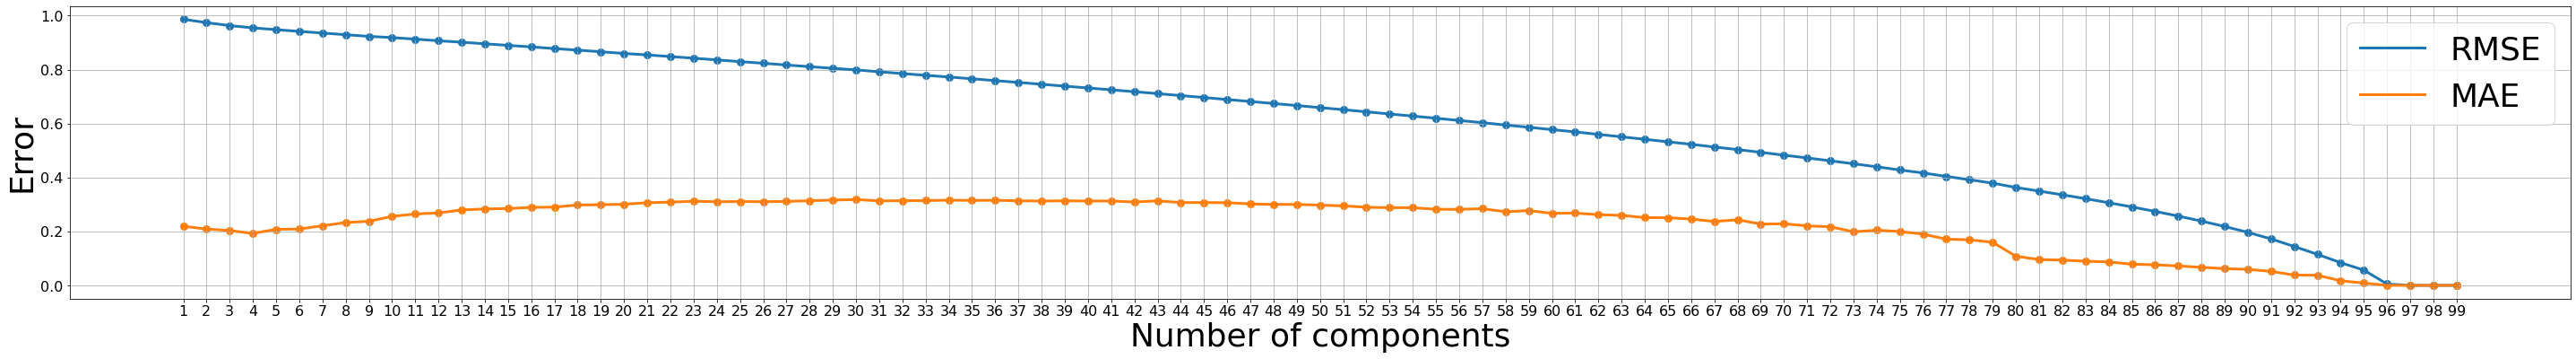

In [20]:
plt.figure(figsize=(50, 6))
plt.plot(n_components, rmses, linewidth=3, label='RMSE') 
plt.scatter(n_components, rmses, linewidth=3) 
plt.plot(n_components, maes, linewidth=3, label='MAE') 
plt.scatter(n_components, maes, linewidth=3) 
plt.xticks(n_components, size=16)
plt.yticks(size=16)
plt.xlabel('Number of components', size=36) 
plt.ylabel('Error', size=36)
plt.legend(loc='best', fontsize=36)
plt.grid(b=1)
plt.show()

In [21]:
print("for 3 RMSE:", "%.4f" % rmses[2], ", MSE:", "%.4f" % maes[2])
print("for 4 RMSE:", "%.4f" % rmses[3], ", MSE:", "%.4f" % maes[3])

for 3 RMSE: 0.9631 , MSE: 0.2032
for 4 RMSE: 0.9546 , MSE: 0.1927


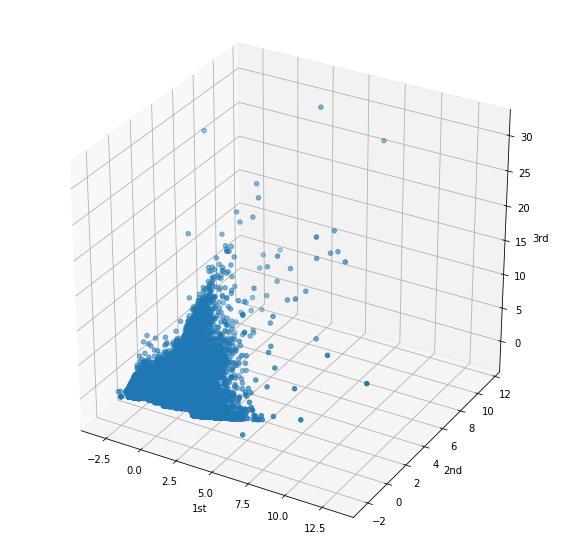

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(principalComponents, columns = ['principal component 1', 
                                                           'principal component 2', 
                                                           'principal component 3'])
x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = principalDf['principal component 3']

#threedee = plt.figure().gca(projection='3d')
#threedee.scatter(x, y, z)

threedee= plt.figure(figsize=(10, 10)).add_subplot(111, projection= '3d')
threedee.scatter(x,y,z)

threedee.set_xlabel('1st')
threedee.set_ylabel('2nd')
threedee.set_zlabel('3rd')

#threedee.plot(x, z, 'r+', zdir='y', zs=1.5)
#threedee.plot(y, z, 'g+', zdir='x', zs=-0.5)
#threedee.plot(x, y, 'k+', zdir='z', zs=-1.5)

#threedee.set_xlim([-5, 35])
#threedee.set_ylim([-10, 40])
#threedee.set_zlim([-5, 25])

plt.show()

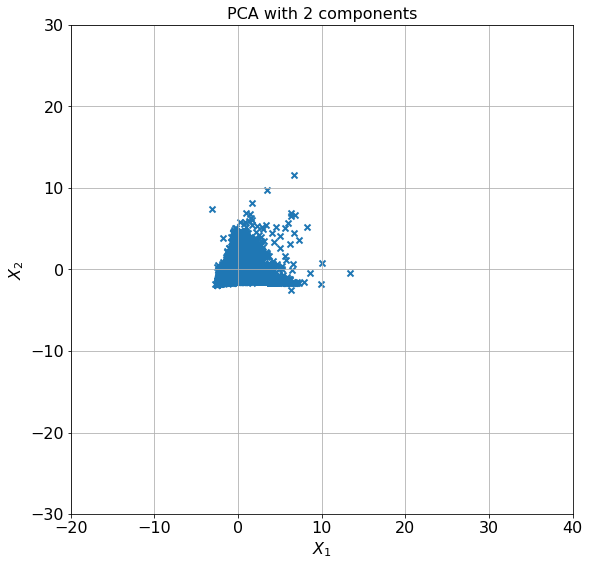

In [22]:
pca = PCA(n_components=2) 
pca.fit(X)
X_pca_2 = pca.transform(X)
plt.figure(figsize=(9, 9))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], linewidth=2, marker="x") 
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'$X_{1}$', size=16)
plt.ylabel(r'$X_{2}$', size=16)
plt.title("PCA with 2 components", size=16)
plt.grid(b=1)
plt.xlim(-20, 40) 
plt.ylim(-30, 30)
plt.show()

Projecting 100-dimensional data to 2D


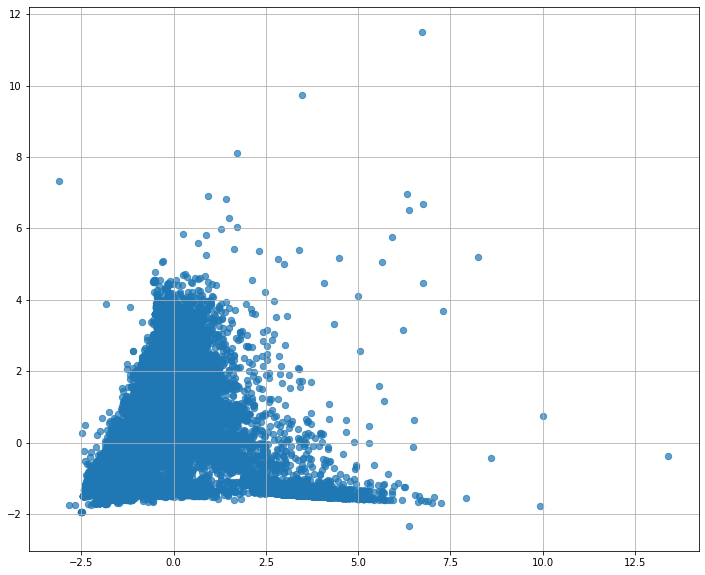

In [23]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.grid(b=1)


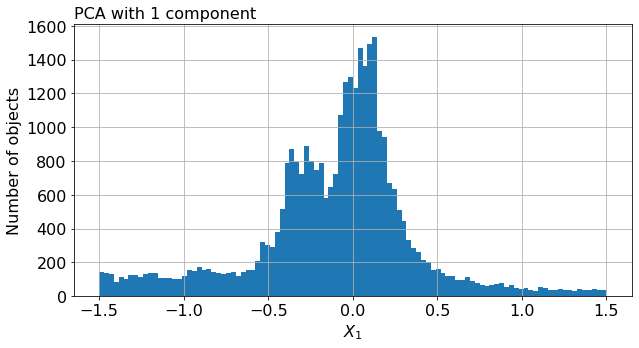

In [24]:
import numpy as np

pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
bins = np.linspace(-1.5, 1.5, 105)
plt.hist(XPCAreduced[:, 0], bins=bins)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'$X_{1}$', size=16)
plt.ylabel(r'Number of objects', size=16) 
plt.title("PCA with 1 component", loc='left', size=16)
plt.grid(b=1) #show lines
plt.show()



In [25]:
print ('Explained variance ratio: ', pca.explained_variance_ratio_)

Explained variance ratio:  [0.02683239]


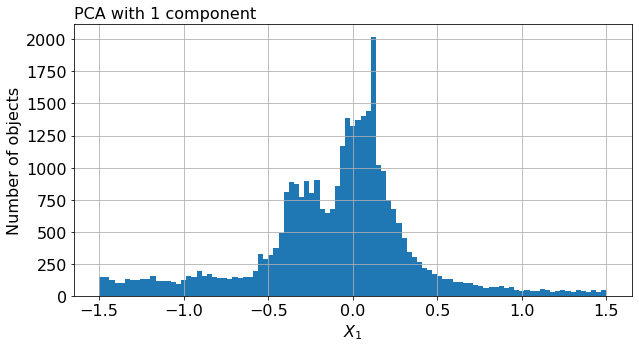

In [26]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca_1 = pca.transform(X)
plt.figure(figsize=(10, 5))
bins = np.linspace(-1.5, 1.5, 100)
plt.hist(X_pca_1[:, 0], bins=bins)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'$X_{1}$', size=16)
plt.ylabel(r'Number of objects', size=16) 
plt.title("PCA with 1 component", loc='left', size=16)
plt.grid(b=1) #show lines
plt.show()

In [0]:
def plot_clusters_2D(X, labels):
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca_2 = pca.transform(X)
    plt.figure(figsize=(10, 10)) 
    for lab in np.unique(labels):
        plt.scatter(X_pca_2[labels==lab, 0], X_pca_2[labels==lab, 1 ], linewidth=2, marker="x", label=str(lab), alpha=0.3)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.xlabel(r'$X_{1}$', size=16)
    plt.ylabel(r'$X_{2}$', size=16)
    plt.title("PCA with 2 components", loc='left', size=16) 
    plt.legend(loc='best', fontsize=16)
    plt.grid(b=1) 
    plt.show()

In [0]:
from tqdm import tqdm, tnrange
from sklearn.cluster import KMeans

In [29]:

n_clusters = np.arange(3, 6)
silhouette = []
with tqdm(total=len(n_clusters)) as pbar: 
    for n in n_clusters:

        clusterer = KMeans(n_clusters=n, random_state=11, n_jobs=-1)
        clusterer.fit(X)
        labels = clusterer.predict(X)
        score = metrics.silhouette_score(X, labels, random_state=11)
        silhouette.append(score) 
        pbar.update(1)

100%|██████████| 3/3 [02:57<00:00, 59.20s/it]


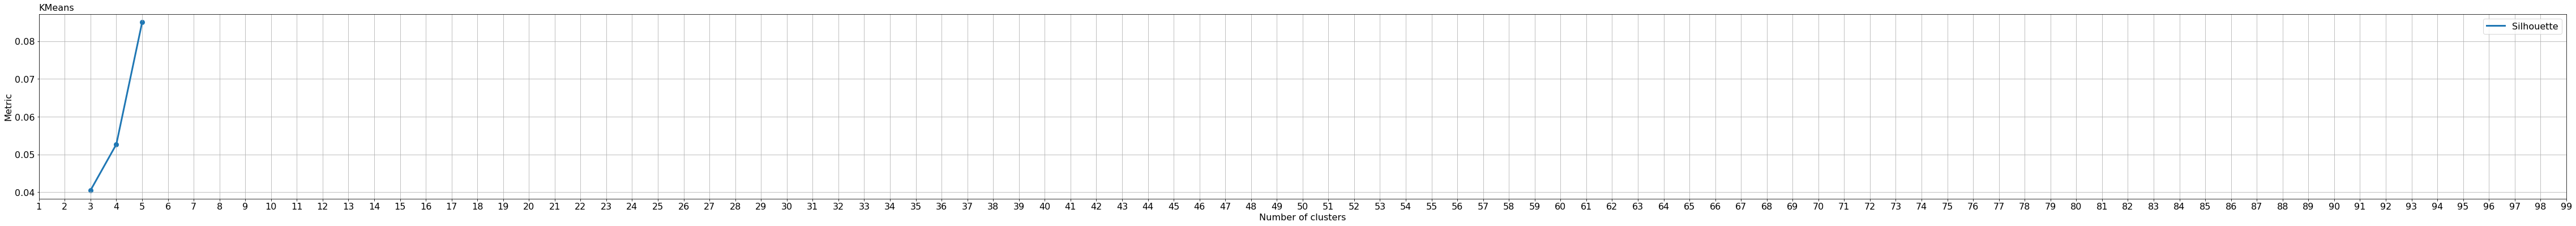

In [30]:
plt.figure(figsize=(80, 6))
plt.plot(n_clusters, silhouette, linewidth=3, label='Silhouette') 
plt.scatter(n_clusters, silhouette, linewidth=3) 
plt.xticks(n_components, size=16)
plt.yticks(size=16)
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Metric', size=16)
plt.legend(loc='best', fontsize=16)
plt.title("KMeans", loc='left', size=16)
plt.grid(b=1) 
plt.show()

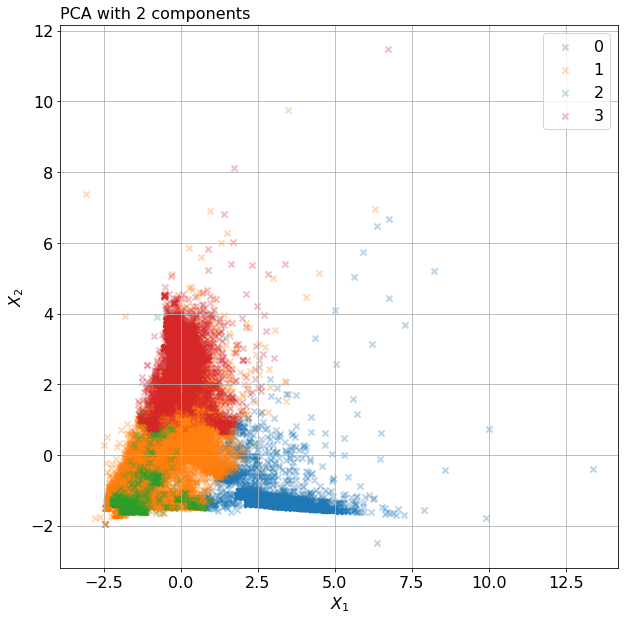

In [71]:
clusterer = KMeans(n_clusters=4, random_state=0, n_jobs=-1) 
clusterer.fit(X)
labels = clusterer.predict(X)
plot_clusters_2D(X, labels)

In [0]:
data['labels'] = labels

In [0]:
clust1 = 0
clust2 = 0
clust3 = 0
clust4 = 0
for x in labels:
    if x == 0:
        clust1 += 1
    elif x == 1:
        clust2 += 1
    elif x == 2:
        clust3 += 1
    else:
        clust4 += 1

In [74]:
data

,Revenue,Marge,КоличествоПроданоКлиенту,КоличествоЧеков,СреднийЧек,СреднийЧислоТоваровЧека,СредняяМаржа,АВТОКРЕСЛА,АКСЕССУАРЫ,АКСЕССУАРЫ ДЛЯ ВОЛОС,АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,"АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР",АКТИВНЫЙ ОТДЫХ,БАКАЛЕЯ,БИЖУТЕРИЯ,БУТЫЛОЧКИ,БЫТОВАЯ ХИМИЯ ДЛЯ ЖИВОТНЫХ,ВЕЛОСИПЕДЫ/САМОКАТЫ,ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,ВИТАМИНЫ/БАДЫ,ВСЁ ДЛЯ ПРАЗДНИКА,ГАЛАНТЕРЕЯ,"ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",ДЕТСКАЯ КОСМЕТИКА,"ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),ДЕТСКАЯ ОДЕЖДА (7-16 лет),ДЕТСКИЕ КОЛГОТКИ И НОСКИ,ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ БЕЛЬЁ,ЗАМЕНИТЕЛИ МОЛОКА,ЗЕРКАЛА,ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,КАНЦТОВАРЫ,КАТАЛКИ/КАЧАЛКИ,КАШИ,КИСЛОМОЛОЧНЫЕ ПРОДУКТЫ,КОЛЯСКИ,КОЛЯСКИ ДЛЯ КУКОЛ,КОНДИТЕРСКИЕ ИЗДЕЛИЯ,КОНСТРУКТОРЫ,"КОПИЛКИ, БРЕЛОКИ, МАГНИТИКИ","КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК",КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,ЛАМПЫ/СВЕТИЛЬНИКИ,МАНЕЖИ/ШЕЗЛОНГИ,МЕДИАПРОДУКЦИЯ,МОЛОКООТСОСЫ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,МЯГКИЕ ИГРУШКИ,НАПИТКИ,НАСТОЛЬНЫЕ ИГРЫ,ОБУВЬ ДЕТСКАЯ,ОБУВЬ ЖЕНСКАЯ,ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),"ОДЕЖДА, ОБУВЬ",ПЕЛЕНКИ ОДНОРАЗОВЫЕ,ПОДГУЗНИКИ,ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ,ПОСТЕЛЬНОЕ БЕЛЬЕ,ПОСУДА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ,ПЮРЕ,САНКИ/СНЕГОКАТЫ,СИСТЕМЫ ХРАНЕНИЯ,СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ,СОСКИ/ПУСТЫШКИ,СПОРТ.ИНВЕНТАРЬ,СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ,СРЕДСТВА БЫТОВОЙ ХИМИИ,СРЕДСТВА ГИГИЕНЫ,СУВЕНИРНАЯ ПРОДУКЦИЯ,СУМКИ,СУМКИ ДЛЯ МАМ,ТВОРЧЕСТВО,ТЕХНИКА ДЛЯ КРАСОТЫ И ЗДОРОВЬЯ,ТОВАРЫ ДЛЯ ГРЫЗУНОВ,ТОВАРЫ ДЛЯ КОШЕК,ТОВАРЫ ДЛЯ МАМ,ТОВАРЫ ДЛЯ ПТИЦ,ТОВАРЫ ДЛЯ РЫБ,ТОВАРЫ ДЛЯ СОБАК,ТОВАРЫ ДЛЯ ХОРЬКОВ,ТОВАРЫ ДЛЯ ЧЕРЕПАХ И РЕПТИЛИЙ,ТРУСИКИ НЕПРОМОКАЕМЫЕ,"ФИГУРЫ, ПЕРСОНАЖИ",ФОТОАЛЬБОМЫ/ФОТОРАМКИ,ХОДУНКИ/ПРЫГУНКИ,ХОЗЯЙСТВЕННЫЕ ТОВАРЫ,ЧАСЫ/ОЧКИ,"ШАПКИ, ШАРФЫ",ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ,ЭЛЕКТРОПРИБОРЫ,ЭЛЕМЕНТЫ ПИТАНИЯ,ИГРУШКИ,ИНОЕ,КГТ,ОДЕЖДА,ППКП,Безналичная,Наличная,МО,Москва,Регионы,labels
0,1039.0,174.66,5,1,1039.0,5.0,174.660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,1
1,1630.0,376.02,1,1,1630.0,1.0,376.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,1
2,62740.0,27213.00,2,1,62740.0,2.0,27213.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0
3,4460.0,1467.00,1,1,4460.0,1.0,1467.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0
4,4801.0,953.85,12,2,2400.5,6.0,476.925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.000000,0.0,0

In [75]:
print("1 clust: %.4f" % (clust1/rows))
print("2 clust: %.4f" % (clust2/rows))
print("3 clust: %.4f" % (clust3/rows))
print("4 clust: %.4f" % (clust4/rows))

1 clust: 0.0399
2 clust: 0.5298
3 clust: 0.2966
4 clust: 0.1338
